<a href="https://colab.research.google.com/github/mfarisherlansyah/IBM_Capstone_Project/blob/main/yogyakarta_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, import necessary libraries.

In [ ]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import requests
from geopy.geocoders import Nominatim
import folium

Create Requests and BeautifulSoup objects, find the desired table, and convert the table into Pandas data frame.

In [ ]:
req = requests.get("https://kodepos.nomor.net/_kodepos.php?_i=desa-kodepos&sby=000000&daerah=Kota&jobs=Yogyakarta")
soup = BeautifulSoup(req.content, 'lxml')
table = soup.find_all("table")[0]
yogyadf = pd.read_html(str(table))
yogya_districts = pd.DataFrame(yogyadf[13])

Clean and preprocess the data in the data frame.

In [ ]:
yogya_districts.columns = yogya_districts.iloc[1]
yogya_districts = yogya_districts[["Kode POS", "Desa, Kelurahan", "Kecamatan, Distrik", "Kota, Kabupaten"]]
yogya_districts.drop([0, 1], inplace = True)
yogya_districts.reset_index(inplace=True)
yogya_districts.drop(['index'], axis = 1, inplace=True)
yogya_districts.rename(columns={"1": "No", "Desa, Kelurahan": "Kelurahan", "Kecamatan, Distrik": "Kecamatan", "Kota, Kabupaten": "Kota"}, inplace=True)

In [ ]:
yogya_districts["Kode POS"] = yogya_districts["Kode POS"].astype(str)

def filterpostalcode(x):
  return x[-5:]

yogya_districts["Kode POS"] = yogya_districts["Kode POS"].apply(filterpostalcode)

yogya_districts

1,Kode POS,Kelurahan,Kecamatan,Kota
0,55253,Pakuncen,Wirobrajan,Yogyakarta
1,55251,Patangpuluhan,Wirobrajan,Yogyakarta
2,55252,Wirobrajan,Wirobrajan,Yogyakarta
3,55163,Giwangan,Umbulharjo,Yogyakarta
4,55165,Muja Muju,Umbulharjo,Yogyakarta
5,55161,Pandeyan,Umbulharjo,Yogyakarta
6,55166,Semaki,Umbulharjo,Yogyakarta
7,55162,Sorosutan,Umbulharjo,Yogyakarta
8,55167,Tahunan,Umbulharjo,Yogyakarta
9,55164,Warungboto,Umbulharjo,Yogyakarta


In [ ]:
yogya_districts.at[14, "Kelurahan"] = "Gunungketur"
yogya_districts.at[15, "Kelurahan"] = "Purwokinanti"
yogya_districts.at[44, "Kelurahan"] = "Tegalpanggung"
yogya_districts.at[[40, 41], "Kecamatan"] = "Gedongtengen"

yogya_districts

1,Kode POS,Kelurahan,Kecamatan,Kota
0,55253,Pakuncen,Wirobrajan,Yogyakarta
1,55251,Patangpuluhan,Wirobrajan,Yogyakarta
2,55252,Wirobrajan,Wirobrajan,Yogyakarta
3,55163,Giwangan,Umbulharjo,Yogyakarta
4,55165,Muja Muju,Umbulharjo,Yogyakarta
5,55161,Pandeyan,Umbulharjo,Yogyakarta
6,55166,Semaki,Umbulharjo,Yogyakarta
7,55162,Sorosutan,Umbulharjo,Yogyakarta
8,55167,Tahunan,Umbulharjo,Yogyakarta
9,55164,Warungboto,Umbulharjo,Yogyakarta


Let's count how many villages there are in Yogyakarta.

In [ ]:
print('The dataframe has {} districts and {} urban villages.'.format(len(yogya_districts['Kecamatan'].unique()), len(yogya_districts['Kelurahan'].unique())))

The dataframe has 14 districts and 45 urban villages.


The following code will obtain the geographical coordinate of Yogyakarta

In [ ]:
address = 'Yogyakarta, ID'

geolocator = Nominatim(user_agent="yogya_explorer")
location = geolocator.geocode(address)
yoglatitude = location.latitude
yoglongitude = location.longitude
print('The geograpical coordinate of Yogyakarta are {}, {}.'.format(yoglatitude, yoglongitude))

The geograpical coordinate of Yogyakarta are -7.9778383999999996, 110.36722565020224.


In [ ]:
districtarray = np.array(yogya_districts["Kecamatan"] + ", " + yogya_districts["Kota"] + ", Yogyakarta")
districtarray = list(districtarray)

In [ ]:
listdistrictlat = []
listdistrictlon = []

for addr in districtarray:
    villagelocation = geolocator.geocode(addr)
    village_latitude = villagelocation.latitude
    village_longitude = villagelocation.longitude
    listdistrictlat.append(village_latitude)
    listdistrictlon.append(village_longitude)
  
yogya_districts["Lat_Kecamatan"] = listdistrictlat
yogya_districts["Long_Kecamatan"] = listdistrictlon

yogya_districts

1,Kode POS,Kelurahan,Kecamatan,Kota,Lat_Kecamatan,Long_Kecamatan
0,55253,Pakuncen,Wirobrajan,Yogyakarta,-7.802624,110.350447
1,55251,Patangpuluhan,Wirobrajan,Yogyakarta,-7.802624,110.350447
2,55252,Wirobrajan,Wirobrajan,Yogyakarta,-7.802624,110.350447
3,55163,Giwangan,Umbulharjo,Yogyakarta,-7.814378,110.387374
4,55165,Muja Muju,Umbulharjo,Yogyakarta,-7.814378,110.387374
5,55161,Pandeyan,Umbulharjo,Yogyakarta,-7.814378,110.387374
6,55166,Semaki,Umbulharjo,Yogyakarta,-7.814378,110.387374
7,55162,Sorosutan,Umbulharjo,Yogyakarta,-7.814378,110.387374
8,55167,Tahunan,Umbulharjo,Yogyakarta,-7.814378,110.387374
9,55164,Warungboto,Umbulharjo,Yogyakarta,-7.814378,110.387374


In [ ]:
yogya_districts_grouped = yogya_districts.groupby(["Kecamatan"]).min().reset_index()
yogya_districts_grouped = yogya_districts_grouped[["Kode POS", "Kecamatan", "Kota", "Lat_Kecamatan", "Long_Kecamatan"]]

yogya_districts_grouped

1,Kode POS,Kecamatan,Kota,Lat_Kecamatan,Long_Kecamatan
0,55211,Danurejan,Yogyakarta,-7.792842,110.371795
1,55271,Gedongtengen,Yogyakarta,-7.789338,110.363376
2,55221,Gondokusuman,Yogyakarta,-7.786791,110.381157
3,55121,Gondomanan,Yogyakarta,-7.802395,110.366112
4,55231,Jetis,Yogyakarta,-8.035127,110.490835
5,55171,Kotagede,Yogyakarta,-7.818311,110.397941
6,55131,Kraton,Yogyakarta,-7.808799,110.362726
7,55141,Mantrijeron,Yogyakarta,-7.818067,110.359731
8,55151,Mergangsan,Yogyakarta,-7.814734,110.372558
9,55261,Ngampilan,Yogyakarta,-7.802183,110.357603


In [ ]:
# create map of Yogyakarta using latitude and longitude values
map_yogya_districts = folium.Map(location=[yoglatitude, yoglongitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(yogya_districts_grouped['Lat_Kecamatan'], yogya_districts_grouped['Long_Kecamatan'], yogya_districts_grouped['Kecamatan']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_yogya_districts)
    
map_yogya_districts

There was an error in obtaining the geographical coordinate of Jetis district, which seemed to be located in the far south, because there are many places bearing the name Jetis in Central Java and Yogyakarta. </br>
Hence we replace the value with the longitude and latitude values of Jetis district, obtained from Google Maps.

In [ ]:
yogya_districts_grouped.at[4, "Lat_Kecamatan"] = -7.783297
yogya_districts_grouped.at[4, "Long_Kecamatan"] = 110.363649

yogya_districts_grouped

1,Kode POS,Kecamatan,Kota,Lat_Kecamatan,Long_Kecamatan
0,55211,Danurejan,Yogyakarta,-7.792842,110.371795
1,55271,Gedongtengen,Yogyakarta,-7.789338,110.363376
2,55221,Gondokusuman,Yogyakarta,-7.786791,110.381157
3,55121,Gondomanan,Yogyakarta,-7.802395,110.366112
4,55231,Jetis,Yogyakarta,-7.783297,110.363649
5,55171,Kotagede,Yogyakarta,-7.818311,110.397941
6,55131,Kraton,Yogyakarta,-7.808799,110.362726
7,55141,Mantrijeron,Yogyakarta,-7.818067,110.359731
8,55151,Mergangsan,Yogyakarta,-7.814734,110.372558
9,55261,Ngampilan,Yogyakarta,-7.802183,110.357603


Let's recreate the map of districts of Yogyakarta.

In [ ]:
# create map of Yogyakarta using latitude and longitude values
map_yogya_districts = folium.Map(location=[yoglatitude, yoglongitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(yogya_districts_grouped['Lat_Kecamatan'], yogya_districts_grouped['Long_Kecamatan'], yogya_districts_grouped['Kecamatan']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_yogya_districts)
    
map_yogya_districts

Define Foursquare credentials.

In [ ]:
CLIENT_ID = 'M13N0HS0Z5WTCFNYALI0CNL4ER421HJWOHT4WCR1TIP2NLPM' # Foursquare ID
CLIENT_SECRET = '1JEB5SJDPRQKGJ0JDSCOAZVD0BZES4TKIF13IS0HIHFF24GU' # Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: M13N0HS0Z5WTCFNYALI0CNL4ER421HJWOHT4WCR1TIP2NLPM
CLIENT_SECRET:1JEB5SJDPRQKGJ0JDSCOAZVD0BZES4TKIF13IS0HIHFF24GU


Let's explore Gedongtengen, a district where the Yogyakarta Railway Station is located. What is the geographical coordinate of Gedongtengen?

In [ ]:
district_latitude = yogya_districts_grouped.loc[1, 'Lat_Kecamatan'] # neighborhood latitude value
district_longitude = yogya_districts_grouped.loc[1, 'Long_Kecamatan'] # neighborhood longitude value

district_name = yogya_districts_grouped.loc[1, 'Kecamatan'] # neighborhood name

print(yogya_districts_grouped.loc[1, 'Kecamatan'])
print('Latitude and longitude values of {} are {}, {}.'.format(yogya_districts_grouped.loc[1, 'Kecamatan'], 
                                                               yogya_districts_grouped.loc[1, 'Lat_Kecamatan'], 
                                                               yogya_districts_grouped.loc[1, 'Long_Kecamatan']))

Gedongtengen
Latitude and longitude values of Gedongtengen are -7.78933775, 110.36337628399158.


Let's obtain the top venues located near the center of Kotagede within a radius of 500 metres.

In [ ]:
radius = 500
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, district_latitude, \
                                                                                                                          district_longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=M13N0HS0Z5WTCFNYALI0CNL4ER421HJWOHT4WCR1TIP2NLPM&client_secret=1JEB5SJDPRQKGJ0JDSCOAZVD0BZES4TKIF13IS0HIHFF24GU&ll=-7.78933775,110.36337628399158&v=20180605&radius=500&limit=100'

Import data from the above URL.

In [ ]:
results_data = requests.get(url).json()
results_data

{'meta': {'code': 200, 'requestId': '610a3c537deed174ee8d258e'},
 'response': {'confident': False,
  'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/trainstation_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d129951735',
      'name': 'Train Station',
      'pluralName': 'Train Stations',
      'primary': True,
      'shortName': 'Train Station'}],
    'hasPerk': False,
    'id': '4bf51d76370e76b042a6bd4a',
    'location': {'address': 'Jl. Pangeran Mangkubumi No. 1',
     'cc': 'ID',
     'city': 'Yogyakarta',
     'country': 'Indonesia',
     'distance': 13,
     'formattedAddress': ['Jl. Pangeran Mangkubumi No. 1',
      'Yogyakarta',
      'DI Yogyakarta 55232',
      'Indonesia'],
     'lat': -7.789425270407101,
     'lng': 110.36345995409161,
     'postalCode': '55232',
     'state': 'DI Yogyakarta'},
    'name': 'Stasiun Yogyakarta Tugu',
    'referralId': 'v-1628060755'},
   {'categories': [{'icon': {'prefix': 'https://ss3.

Create a function that returns the types of venue categories.

In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Let's see venues that are located in or near Gedongtengen.

In [ ]:
import json

venues = results_data['response']['venues']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON
# nearby_venues.head(10)

# # filter columns
# filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
filtered_columns = ['name', 'categories', 'location.lat', 'location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# # filter the category for each row
nearby_venues['categories'] = nearby_venues.apply(get_category_type, axis=1)
# nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Stasiun Yogyakarta Tugu,Train Station,-7.789425,110.363460
1,Loko Cafe,Café,-7.789171,110.363488
2,Jogja Scrummy Stasiun Tugu,Food & Drink Shop,-7.789426,110.363686
3,Roti Cane Maryam Sta. Tugu,Bakery,-7.789235,110.363395
4,Top Roof Inna Garuda Hotel,Roof Deck,-7.789274,110.363896
5,Executive Argowilis Jogja Surabaya,None,-7.789364,110.363349
6,KI8 express,Shipping Store,-7.789199,110.363716
7,Roti 'O,Bakery,-7.789321,110.363541
8,Pops hotel,Hotel,-7.789260,110.363413
9,Kiko Cafe Sta. Tugu,Japanese Restaurant,-7.789177,110.363523


We can see from the above data frame that there are a railway station and food shops in Gedongtengen.

How many venues in or near Gedongtengen returned by Foursquare?

In [ ]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


Let's repeat the above process for all districts in Yogyakarta.

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # results = requests.get(url).json()['response']['venues']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Apply the above function to create a data frame containing listed venues in Yogyakarta and their respective geographical coordinates.

In [ ]:
yogya_venues = getNearbyVenues(names = yogya_districts_grouped['Kecamatan'], \
                                 latitudes = yogya_districts_grouped['Lat_Kecamatan'], \
                                 longitudes = yogya_districts_grouped['Long_Kecamatan'])
yogya_venues.head()

Danurejan
Gedongtengen
Gondokusuman
Gondomanan
Jetis
Kotagede
Kraton
Mantrijeron
Mergangsan
Ngampilan
Pakualaman
Tegalrejo
Umbulharjo
Wirobrajan


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Danurejan,-7.792842,110.371795,Laura's Backpackers,-7.790985,110.370988,Hostel
1,Danurejan,-7.792842,110.371795,Jagung Bakar Menthel,-7.792026,110.373640,Snack Place
2,Danurejan,-7.792842,110.371795,BAKPIAKU Gajah Mada (pusat),-7.797168,110.372700,Bakery
3,Danurejan,-7.792842,110.371795,Bakpia Citra Premium,-7.793618,110.368021,Snack Place
4,Danurejan,-7.792842,110.371795,Rumah Makan Murni 83,-7.791199,110.372408,Asian Restaurant


In [ ]:
yogya_venues.rename(columns = {"Neighborhood": "District", "Neighborhood Latitude": "District Latitude", "Neighborhood Longitude": "District Longitude"},
                      inplace = True)
yogya_venues.head(10)

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Danurejan,-7.792842,110.371795,Laura's Backpackers,-7.790985,110.370988,Hostel
1,Danurejan,-7.792842,110.371795,Jagung Bakar Menthel,-7.792026,110.373640,Snack Place
2,Danurejan,-7.792842,110.371795,BAKPIAKU Gajah Mada (pusat),-7.797168,110.372700,Bakery
3,Danurejan,-7.792842,110.371795,Bakpia Citra Premium,-7.793618,110.368021,Snack Place
4,Danurejan,-7.792842,110.371795,Rumah Makan Murni 83,-7.791199,110.372408,Asian Restaurant
5,Danurejan,-7.792842,110.371795,Sate Ayam Podomoro,-7.795822,110.369001,Asian Restaurant
6,Danurejan,-7.792842,110.371795,Indomaret Jl.Hayam Wuruk,-7.795520,110.372715,Department Store
7,Danurejan,-7.792842,110.371795,"Spesial Sambal Mentah ""Bu Saring""",-7.792306,110.373451,Asian Restaurant
8,Danurejan,-7.792842,110.371795,warung makan pak parno sate kambing dan tongseng,-7.792491,110.373380,Diner
9,Danurejan,-7.792842,110.371795,Kedai Kopi Mataram,-7.792888,110.367511,Coffee Shop


Check the shape of yogya_venues

In [ ]:
print(yogya_venues.shape)

(373, 7)


How many venues returned for each district?

In [ ]:
yogya_venues[["District", "Venue"]].groupby('District').count()

,Venue
District,
Danurejan,16
Gedongtengen,39
Gondokusuman,33
Gondomanan,53
Jetis,66
Kotagede,13
Kraton,30
Mantrijeron,25
Mergangsan,24


Let's start analyzing the districts.

We would like to perform one-hot encoding first to help categorizing venues and districts.

In [ ]:
# one hot encoding
yogya_onehot = pd.get_dummies(yogya_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
yogya_onehot['District'] = yogya_venues['District'] 

# move neighborhood column to the first column
columnslist = list(yogya_onehot.columns.values)
columnslist.pop(columnslist.index('District'))

yogya_onehot = yogya_onehot[['District'] + columnslist]

yogya_onehot.head()

,District,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Basketball Stadium,Batik Shop,Beach,Bed & Breakfast,Beer Garden,Betawinese Restaurant,Bookstore,Boutique,Breakfast Spot,Buffet,Burger Joint,Café,Castle,Chinese Restaurant,Clothing Store,Coffee Shop,Concert Hall,Convenience Store,Dance Studio,Department Store,Dessert Shop,Diner,Eastern European Restaurant,Electronics Store,Fair,Fast Food Restaurant,Flea Market,Food & Drink Shop,Food Court,Food Truck,...,Massage Studio,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mosque,Museum,Music Store,Noodle House,Office,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Restaurant,Salon / Barbershop,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Sports Bar,Steakhouse,Street Food Gathering,Supermarket,Thai Restaurant,Theater,Theme Park,Train,Tree,University
0,Danurejan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Danurejan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Danurejan,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Danurejan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Danurejan,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Check the shape of yogya_onehot

In [ ]:
print(yogya_onehot.shape)

(373, 97)


Let's group rows by district and see the mean of the frequency of occurence of each category to measure occurrence density.

In [ ]:
yogya_venues_grouped = yogya_onehot.groupby('District').mean().reset_index()
yogya_venues_grouped

,District,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Basketball Stadium,Batik Shop,Beach,Bed & Breakfast,Beer Garden,Betawinese Restaurant,Bookstore,Boutique,Breakfast Spot,Buffet,Burger Joint,Café,Castle,Chinese Restaurant,Clothing Store,Coffee Shop,Concert Hall,Convenience Store,Dance Studio,Department Store,Dessert Shop,Diner,Eastern European Restaurant,Electronics Store,Fair,Fast Food Restaurant,Flea Market,Food & Drink Shop,Food Court,Food Truck,...,Massage Studio,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Mosque,Museum,Music Store,Noodle House,Office,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Restaurant,Salon / Barbershop,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Sports Bar,Steakhouse,Street Food Gathering,Supermarket,Thai Restaurant,Theater,Theme Park,Train,Tree,University
0,Danurejan,0.000000,0.000000,0.000000,0.000000,0.062500,0.250000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.062500,0.000000,0.000000,0.000000,0.062500,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.062500,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Gedongtengen,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.051282,0.000000,0.000000,0.000000,0.025641,0.025641,0.0000,0.000000,0.000000,0.051282,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051282,...,0.025641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000,0.025641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000,0.051282,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025641,0.000000,0.000000
2,Gondokusuman,0.030303,0.030303,0.000000,0.000000,0.000000,0.060606,0.090909,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.060606,0.060606,0.000000,0.000000,0.030303,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.060606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.151515,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.030303,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.00,0.000000,0.030303,0.000000,0.030303,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000
3,Gondomanan,0.000000,0.018868,0.056604,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018868,0.018868,0.018868,0.000000,0.0000,0.018868,0.018868,0.018868,0.000000,0.000000,0.018868,0.018868,0.056604,0.056604,0.000000,0.037736,0.000000,0.000000,0.018868,0.000000,0.037736,0.000000,0.000000,0.018868,0.000000,0.000000,0.000000,0.000000,0.018868,...,0.000000,0.000000,0.018868,0.000000,0.018868,0.018868,0.037736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018868,0.000000,0.000000,0.000000,0.018868,0.018868,0.037736,0.000000,0.018868,0.018868,0.000000,0.000000,0.000000,0.000000,0.000000,0.018868,0.00,0.018868,0.000000,0.000000,0.000000,0.000000,0.018868,0.018868,0.000000,0.000000,0.000000
4,Jetis,0.000000,0.000000,0.000000,0.000000

In [ ]:
print(yogya_venues_grouped.shape)

(14, 97)


Let's see the top five venues in each district.

In [ ]:
num_top_venues = 5

for district in yogya_venues_grouped['District']:
    print("----"+district+"----")
    temp = yogya_venues_grouped[yogya_venues_grouped['District'] == district].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Danurejan----
                   venue  freq
0       Asian Restaurant  0.25
1            Snack Place  0.12
2                 Hostel  0.06
3  Betawinese Restaurant  0.06
4                  Diner  0.06


----Gedongtengen----
                   venue  freq
0                  Hotel  0.26
1  Indonesian Restaurant  0.13
2                   Café  0.08
3           Noodle House  0.08
4            Coffee Shop  0.08


----Gondokusuman----
                   venue  freq
0             Food Truck  0.15
1  Indonesian Restaurant  0.09
2              BBQ Joint  0.09
3         Breakfast Spot  0.06
4                  Diner  0.06


----Gondomanan----
                   venue  freq
0  Indonesian Restaurant  0.09
1          Historic Site  0.06
2     Chinese Restaurant  0.06
3         Clothing Store  0.06
4            Art Gallery  0.06


----Jetis----
                   venue  freq
0                  Hotel  0.20
1       Asian Restaurant  0.11
2            Coffee Shop  0.09
3  Indonesian Restaurant  0.08


In [ ]:
print(yogya_venues_grouped.columns)

Index(['District', 'American Restaurant', 'Arcade', 'Art Gallery',
       'Art Museum', 'Arts & Crafts Store', 'Asian Restaurant', 'BBQ Joint',
       'Bakery', 'Bar', 'Basketball Stadium', 'Batik Shop', 'Beach',
       'Bed & Breakfast', 'Beer Garden', 'Betawinese Restaurant', 'Bookstore',
       'Boutique', 'Breakfast Spot', 'Buffet', 'Burger Joint', 'Café',
       'Castle', 'Chinese Restaurant', 'Clothing Store', 'Coffee Shop',
       'Concert Hall', 'Convenience Store', 'Dance Studio', 'Department Store',
       'Dessert Shop', 'Diner', 'Eastern European Restaurant',
       'Electronics Store', 'Fair', 'Fast Food Restaurant', 'Flea Market',
       'Food & Drink Shop', 'Food Court', 'Food Truck', 'French Restaurant',
       'Fried Chicken Joint', 'Gourmet Shop', 'Government Building',
       'Grocery Store', 'Gym / Fitness Center', 'Halal Restaurant',
       'Historic Site', 'History Museum', 'Hostel', 'Hotel', 'Ice Cream Shop',
       'Indonesian Restaurant', 'Italian Restaurant', 

We can return the above data into a dataframe by executing the code below.

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = yogya_venues_grouped['District']

for ind in np.arange(yogya_venues_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(yogya_venues_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Danurejan,Asian Restaurant,Snack Place,Bakery,Department Store,Diner,Betawinese Restaurant,Soup Place,Indonesian Restaurant,Chinese Restaurant,Coffee Shop
1,Gedongtengen,Hotel,Indonesian Restaurant,Noodle House,Coffee Shop,Café,Breakfast Spot,Food Truck,Bar,Soup Place,Shoe Store
2,Gondokusuman,Food Truck,Indonesian Restaurant,BBQ Joint,Diner,Breakfast Spot,Asian Restaurant,Boutique,Italian Restaurant,Department Store,Chinese Restaurant
3,Gondomanan,Indonesian Restaurant,Historic Site,Clothing Store,Art Gallery,Chinese Restaurant,Museum,Restaurant,Diner,Javanese Restaurant,Concert Hall
4,Jetis,Hotel,Asian Restaurant,Coffee Shop,Indonesian Restaurant,Food Truck,Bakery,Chinese Restaurant,Noodle House,Restaurant,Convenience Store


Now, let's try clustering the venues into clusters. First, we choose the best k by executing the code below. The elbow rule will be applied, which means that the best k value is located at the "elbow" of the curve.

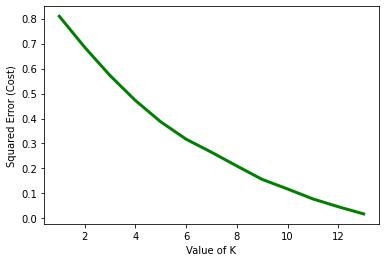

In [ ]:
import matplotlib.pyplot as plt 
from matplotlib import style
from sklearn.cluster import KMeans

yogya_grouped_clustering = yogya_venues_grouped.drop('District', 1)

cost =[]
for i in range(1, 14):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(yogya_grouped_clustering)
      
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)     
  
# plot the cost against K values
plt.plot(range(1, 14), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot
  
# the point of the elbow is the 
# most optimal value for choosing k

In [ ]:
# set number of clusters
kclusters = 6

# yogya_grouped_clustering = yogya_venues_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(yogya_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 0, 0, 2, 3, 0, 0, 2, 1], dtype=int32)

In [ ]:
# add clustering labels
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

yogya_merged = yogya_districts_grouped

# merge jakarta_grouped with subdistrict_venues_sorted to add latitude/longitude for each neighborhood
yogya_merged = yogya_merged.merge(district_venues_sorted.set_index('District'), left_on='Kecamatan', right_on = 'District')

yogya_merged.head() # check the last columns!

,Kode POS,Kecamatan,Kota,Lat_Kecamatan,Long_Kecamatan,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,55211,Danurejan,Yogyakarta,-7.792842,110.371795,0,Asian Restaurant,Snack Place,Bakery,Department Store,Diner,Betawinese Restaurant,Soup Place,Indonesian Restaurant,Chinese Restaurant,Coffee Shop
1,55271,Gedongtengen,Yogyakarta,-7.789338,110.363376,1,Hotel,Indonesian Restaurant,Noodle House,Coffee Shop,Café,Breakfast Spot,Food Truck,Bar,Soup Place,Shoe Store
2,55221,Gondokusuman,Yogyakarta,-7.786791,110.381157,0,Food Truck,Indonesian Restaurant,BBQ Joint,Diner,Breakfast Spot,Asian Restaurant,Boutique,Italian Restaurant,Department Store,Chinese Restaurant
3,55121,Gondomanan,Yogyakarta,-7.802395,110.366112,0,Indonesian Restaurant,Historic Site,Clothing Store,Art Gallery,Chinese Restaurant,Museum,Restaurant,Diner,Javanese Restaurant,Concert Hall
4,55231,Jetis,Yogyakarta,-7.783297,110.363649,2,Hotel,Asian Restaurant,Coffee Shop,Indonesian Restaurant,Food Truck,Bakery,Chinese Restaurant,Noodle House,Restaurant,Convenience Store


In [ ]:
yogya_merged

,Kode POS,Kecamatan,Kota,Lat_Kecamatan,Long_Kecamatan,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,55211,Danurejan,Yogyakarta,-7.792842,110.371795,0,Asian Restaurant,Snack Place,Bakery,Department Store,Diner,Betawinese Restaurant,Soup Place,Indonesian Restaurant,Chinese Restaurant,Coffee Shop
1,55271,Gedongtengen,Yogyakarta,-7.789338,110.363376,1,Hotel,Indonesian Restaurant,Noodle House,Coffee Shop,Café,Breakfast Spot,Food Truck,Bar,Soup Place,Shoe Store
2,55221,Gondokusuman,Yogyakarta,-7.786791,110.381157,0,Food Truck,Indonesian Restaurant,BBQ Joint,Diner,Breakfast Spot,Asian Restaurant,Boutique,Italian Restaurant,Department Store,Chinese Restaurant
3,55121,Gondomanan,Yogyakarta,-7.802395,110.366112,0,Indonesian Restaurant,Historic Site,Clothing Store,Art Gallery,Chinese Restaurant,Museum,Restaurant,Diner,Javanese Restaurant,Concert Hall
4,55231,Jetis,Yogyakarta,-7.783297,110.363649,2,Hotel,Asian Restaurant,Coffee Shop,Indonesian Restaurant,Food Truck,Bakery,Chinese Restaurant,Noodle House,Restaurant,Convenience Store
5,55171,Kotagede,Yogyakarta,-7.818311,110.397941,3,Indonesian Restaurant,Convenience Store,Grocery Store,Department Store,Supermarket,Steakhouse,Food Truck,Breakfast Spot,Soup Place,Middle Eastern Restaurant
6,55131,Kraton,Yogyakarta,-7.808799,110.362726,0,Historic Site,Indonesian Restaurant,Javanese Restaurant,Café,Asian Restaurant,Bakery,Museum,Food Truck,Salon / Barbershop,Boutique
7,55141,Mantrijeron,Yogyakarta,-7.818067,110.359731,0,Café,Art Gallery,Coffee Shop,Indonesian Restaurant,Pizza Place,Boutique,Convenience Store,Javanese Restaurant,Italian Restaurant,Other Great Outdoors
8,55151,Mergangsan,Yogyakarta,-7.814734,110.372558,2,Indonesian Restaurant,Convenience Store,Noodle House,Hotel,Asian Restaurant,Bakery,History Museum,Dance Studio,Chinese Restaurant,Café
9,55261,Ngampilan,Yogyakarta,-7.802183,110.357603,1,Hotel,Indonesian Restaurant,Bed & Breakfast,Hostel,Dessert Shop,Bakery,Café,Flea Market,Dance Studio,Department Store


Let's map the clusters using Folium to see which districts the clusters belong to.

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[yoglatitude, yoglongitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(yogya_merged['Lat_Kecamatan'], yogya_merged['Long_Kecamatan'], \
                                  yogya_merged['Kecamatan'], yogya_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
yogya_merged[yogya_merged["Cluster Labels"] == 0]

,Kode POS,Kecamatan,Kota,Lat_Kecamatan,Long_Kecamatan,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,55211,Danurejan,Yogyakarta,-7.792842,110.371795,0,Asian Restaurant,Snack Place,Bakery,Department Store,Diner,Betawinese Restaurant,Soup Place,Indonesian Restaurant,Chinese Restaurant,Coffee Shop
2,55221,Gondokusuman,Yogyakarta,-7.786791,110.381157,0,Food Truck,Indonesian Restaurant,BBQ Joint,Diner,Breakfast Spot,Asian Restaurant,Boutique,Italian Restaurant,Department Store,Chinese Restaurant
3,55121,Gondomanan,Yogyakarta,-7.802395,110.366112,0,Indonesian Restaurant,Historic Site,Clothing Store,Art Gallery,Chinese Restaurant,Museum,Restaurant,Diner,Javanese Restaurant,Concert Hall
6,55131,Kraton,Yogyakarta,-7.808799,110.362726,0,Historic Site,Indonesian Restaurant,Javanese Restaurant,Café,Asian Restaurant,Bakery,Museum,Food Truck,Salon / Barbershop,Boutique
7,55141,Mantrijeron,Yogyakarta,-7.818067,110.359731,0,Café,Art Gallery,Coffee Shop,Indonesian Restaurant,Pizza Place,Boutique,Convenience Store,Javanese Restaurant,Italian Restaurant,Other Great Outdoors


We can see that districts included in Cluster 0 are full of Indonesian restaurants and places that have cultural or historic vibes. For example, the Keraton Yogyakarta and Fort Vredeburg are all located in Cluster 0. Hence, we can recommend Yogyakarta visitors to explore these five districts if they would like to have a more cultural/historical experience.

Let's inspect districts labelled with cluster label 1

In [ ]:
yogya_merged[yogya_merged["Cluster Labels"] == 1]

,Kode POS,Kecamatan,Kota,Lat_Kecamatan,Long_Kecamatan,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,55271,Gedongtengen,Yogyakarta,-7.789338,110.363376,1,Hotel,Indonesian Restaurant,Noodle House,Coffee Shop,Café,Breakfast Spot,Food Truck,Bar,Soup Place,Shoe Store
9,55261,Ngampilan,Yogyakarta,-7.802183,110.357603,1,Hotel,Indonesian Restaurant,Bed & Breakfast,Hostel,Dessert Shop,Bakery,Café,Flea Market,Dance Studio,Department Store


We can see that the most common venue in the three districts is hotel, followed by restaurant. It is confirmed because when we look at Maps, there are many hotels located around these three districts. Plus the Yogyakarta railway station is located in Cluster 1, which makes sense if there are a bunch of hotels in and around the area to facilitate visitors with ease of transport.

In [ ]:
yogya_merged[yogya_merged["Cluster Labels"] == 2]

,Kode POS,Kecamatan,Kota,Lat_Kecamatan,Long_Kecamatan,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,55231,Jetis,Yogyakarta,-7.783297,110.363649,2,Hotel,Asian Restaurant,Coffee Shop,Indonesian Restaurant,Food Truck,Bakery,Chinese Restaurant,Noodle House,Restaurant,Convenience Store
8,55151,Mergangsan,Yogyakarta,-7.814734,110.372558,2,Indonesian Restaurant,Convenience Store,Noodle House,Hotel,Asian Restaurant,Bakery,History Museum,Dance Studio,Chinese Restaurant,Café
10,55111,Pakualaman,Yogyakarta,-7.800395,110.376249,2,Hotel,Convenience Store,Ice Cream Shop,Pizza Place,Department Store,Castle,Fast Food Restaurant,Noodle House,Javanese Restaurant,Food & Drink Shop
13,55251,Wirobrajan,Yogyakarta,-7.802624,110.350447,2,Hotel,Food Truck,Clothing Store,Bakery,Convenience Store,Soccer Field,Indonesian Restaurant,Halal Restaurant,Asian Restaurant,Supermarket


In [ ]:
yogya_merged[yogya_merged["Cluster Labels"] == 3]

,Kode POS,Kecamatan,Kota,Lat_Kecamatan,Long_Kecamatan,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,55171,Kotagede,Yogyakarta,-7.818311,110.397941,3,Indonesian Restaurant,Convenience Store,Grocery Store,Department Store,Supermarket,Steakhouse,Food Truck,Breakfast Spot,Soup Place,Middle Eastern Restaurant
11,55241,Tegalrejo,Yogyakarta,-7.780455,110.355073,3,Indonesian Restaurant,University,Electronics Store,Convenience Store,Pizza Place,Noodle House,Supermarket,Burger Joint,Bakery,Juice Bar


In [ ]:
yogya_merged[yogya_merged["Cluster Labels"] == 4]

,Kode POS,Kecamatan,Kota,Lat_Kecamatan,Long_Kecamatan,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,55161,Umbulharjo,Yogyakarta,-7.814378,110.387374,4,Café,Art Museum,Soup Place,Asian Restaurant,Food Truck,Indonesian Restaurant,Flea Market,Coffee Shop,Arts & Crafts Store,Government Building
